# **Project on Heart attack Prediction using ML algorthims**

**Problem statement:**
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 


Logistic Regression and Random Forest will be used to predict the heart attack for given details of Patient

Loading required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

Importing data into Google drive

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 1645792390_cep1_dataset.xlsx to 1645792390_cep1_dataset.xlsx


Reading the file

In [ ]:
df= pd.read_excel("1645792390_cep1_dataset.xlsx")

Checking first 5 rows

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking the shape of Dataframe

In [ ]:
df.shape

(303, 14)

Checking the Data types

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Checking the null values

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No null values found in the dataset

Checking for any duplicated observations and delete them

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(302, 14)

One duplicate found and dleted

Checking some statistical data 

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Checking for outliers**

Ploting Box plot

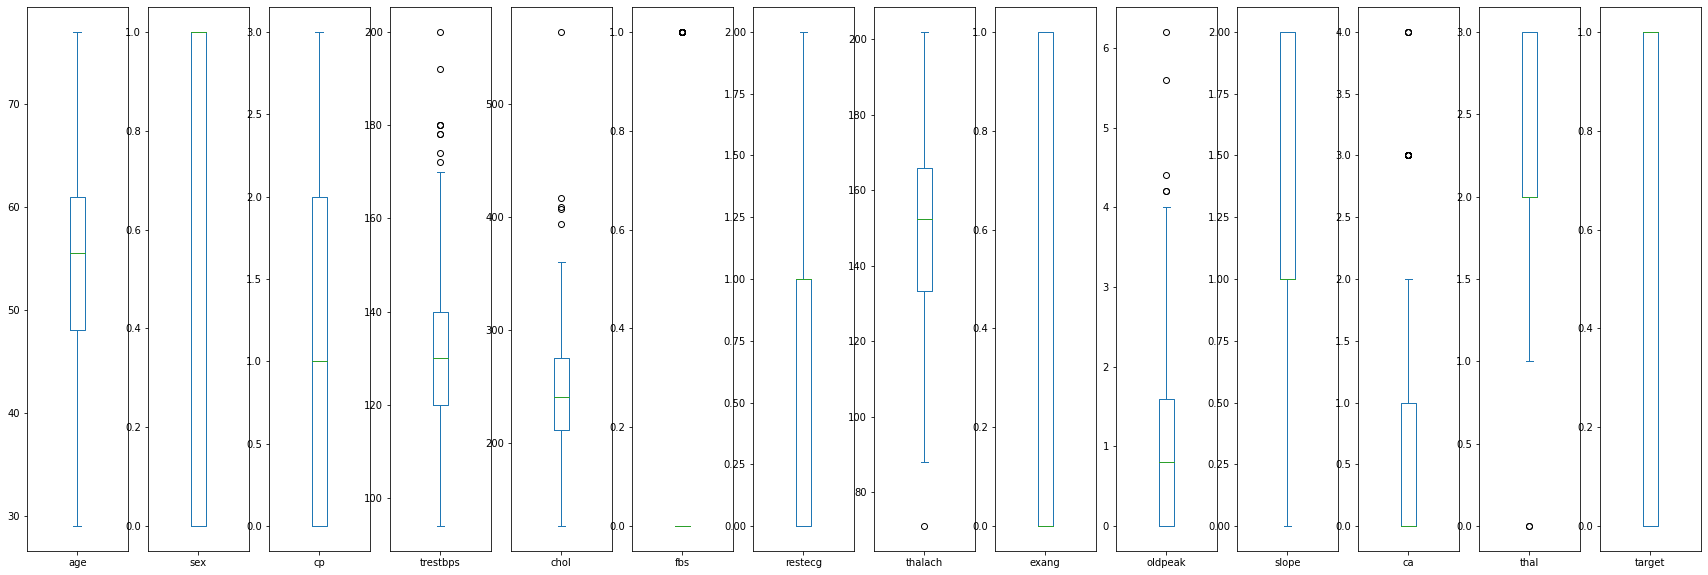

In [ ]:
# boxplot
df.plot(kind='box', subplots= True, figsize=(30,10));

Outliers are identified in "trestbps ","chol", "thalach", "oldpeak", and "thal"

Capping and flooring the outliers with Upper ,imit and lower limit of Inter quartile ranges

Creating feature list, so that this can be passed into function

In [ ]:
features=['trestbps','chol','thalach','oldpeak','thal']

Definign function for calculation of Upper limit and Lower limit of Quartile ranges

In [ ]:
def iqr_cap(df1,cols):
  for col in cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_range = Q1 - (1.5 * IQR) # min permissible limit
        upper_range = Q3 + (1.5 * IQR) # max permissible limit

        df1[col]=np.where(df1[col]> upper_range,upper_range,np.where(df1[col]<lower_range,lower_range,df1[col]))



Passing parameters in the function

In [ ]:
iqr_cap(df,features)

Ploting again Box plot to check outliers are treated sucessfullly

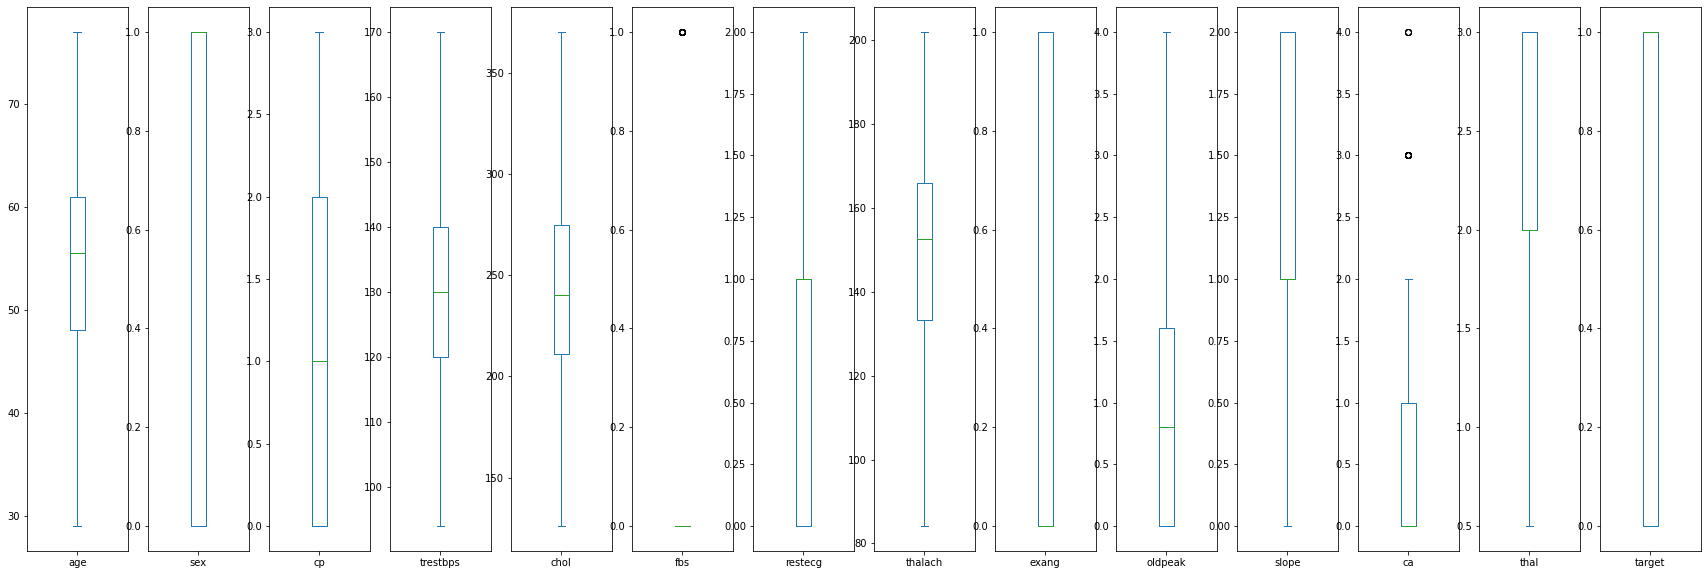

In [ ]:
# boxplot
df.plot(kind='box', subplots= True, figsize=(30,10));

## **EDA**

For EDA , some of the numerical values will be converted to Categorical to have better understanding through graphical representation

Original data frame will be copied to EDA dataframe for computation

In [ ]:
df_eda= df.copy()

Making Target variable , Gender ,examg, fbsto appropriate Categorical varaibles by Passing appropriate Categorical values

In [ ]:
df_eda['target']=df_eda['target'].replace(1,"Yes")
df_eda['target']=df_eda['target'].replace(0,"No")

In [ ]:
df_eda['fbs']=df_eda['fbs'].replace(1,"True")
df_eda['fbs']=df_eda['fbs'].replace(0,"False")

In [ ]:
df_eda['exang']=df_eda['exang'].replace(1,"Yes")
df_eda['exang']=df_eda['exang'].replace(0,"No")

In [ ]:
df_eda['sex']=df_eda['sex'].replace(1,"Male")
df_eda['sex']=df_eda['sex'].replace(0,"Female")

Binning the features "Age", "trestbps", "Chol", "thalach" and "oldpak" 

In [ ]:
bins=[20,30,40,50,60,70,80]
labels=["20-30","30-40","40-50","50 to 60","60 to 70","70 and above"]
df_eda["Age_cat"]= pd.cut(df_eda["age"],bins,labels=labels)

In [ ]:
bins=[90,120,145]
labels=["below 120","Above 120"]
df_eda["trestbps_cat"]= pd.cut(df_eda["trestbps"],bins,labels=labels)

In [ ]:
bins=[120,180,240,300,360,420]
labels=["120-180","180-240","240-300","300-360","Above 360"]
df_eda["chol_cat"]= pd.cut(df_eda["chol"],bins,labels=labels)

In [ ]:
bins=[80,120,160,200,220]
labels=["80-120","120-160","160-200","Above 200"]
df_eda["thalach_cat"]= pd.cut(df_eda["thalach"],bins,labels=labels)

In [ ]:
bins=[0,1,2,3,4]
labels=["0 to 1","1 to 2","2 to 3","Above 3"]
df_eda["oldpeak_cat"]= pd.cut(df_eda["oldpeak"],bins,labels=labels)

Converting "CP,"Slope" ,"ca" and "thal" into categorical values to represent in graphs

In [ ]:
df_eda['cp'] = df_eda['cp'].astype('object')
df_eda['slope'] = df_eda['slope'].astype('object')
df_eda['ca'] = df_eda['ca'].astype('object')
df_eda['thal'] = df_eda['thal'].astype('object')

In [ ]:
df_eda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_cat,trestbps_cat,chol_cat,thalach_cat,oldpeak_cat
0,63,Male,3,145.0,233.0,True,0,150.0,No,2.3,0,0,1.0,Yes,60 to 70,Above 120,180-240,120-160,2 to 3
1,37,Male,2,130.0,250.0,False,1,187.0,No,3.5,0,0,2.0,Yes,30-40,Above 120,240-300,160-200,Above 3
2,41,Female,1,130.0,204.0,False,0,172.0,No,1.4,2,0,2.0,Yes,40-50,Above 120,180-240,160-200,1 to 2
3,56,Male,1,120.0,236.0,False,1,178.0,No,0.8,2,0,2.0,Yes,50 to 60,below 120,180-240,160-200,0 to 1
4,57,Female,0,120.0,354.0,False,1,163.0,Yes,0.6,2,0,2.0,Yes,50 to 60,below 120,300-360,160-200,0 to 1


## Univariate Analysios

Central tendency and Distribution of Age category

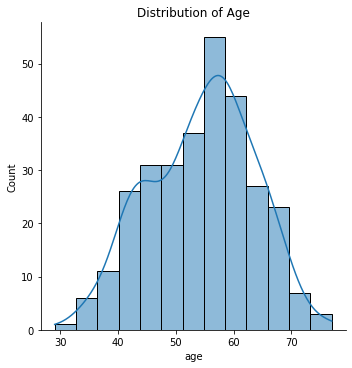

In [ ]:
sns.displot(df['age'],kde=True)  #y axis has percentage, kde-density estimate
plt.title("Distribution of Age")
plt.show()

Mean age is 55 years in the data set, observed normal distribution

------------------------------

Central tendency and Distribution of Cholestrol

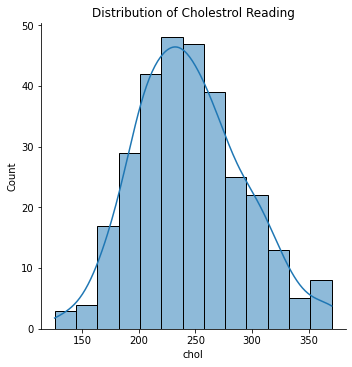

In [ ]:
sns.displot(df['chol'],kde=True)  #y axis has percentage, kde-density estimate
plt.title("Distribution of Cholestrol Reading")
plt.show()

Mean Cholestrol observed in the data set is 246, observed normal distribution for this feature

-------------------------------------

Central tendency and Distribution of trestbps 

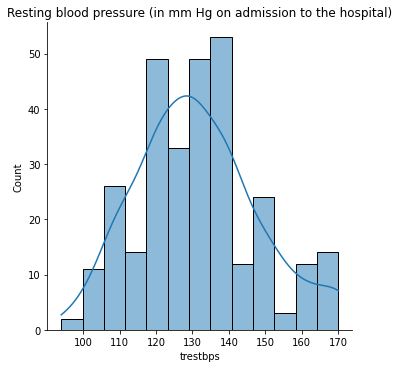

In [ ]:
sns.displot(df['trestbps'],kde=True)  #y axis has percentage, kde-density estimate
plt.title("Resting blood pressure (in mm Hg on admission to the hospital)")
plt.show()

Mean for "trestbps " is 136, this feature also shows normal distribution

----------------------------------------------------

Central tendency and Distribution of thalach (Maximum heart rate achieved)

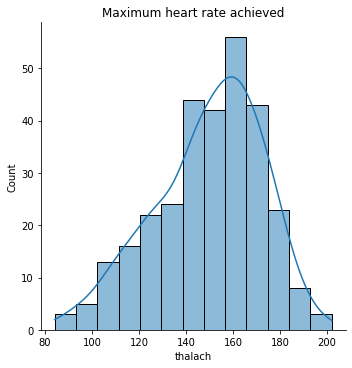

In [ ]:
sns.displot(df['thalach'],kde=True)  #y axis has percentage, kde-density estimate
plt.title("Maximum heart rate achieved")
plt.show()

Mean for "thalach " is 150, this feature also shows normal distribution

----------------------------------------------------------::

### **Bi Variate Analysis and count plots**

**Count Plots**

Distribution of data with respect to Gender

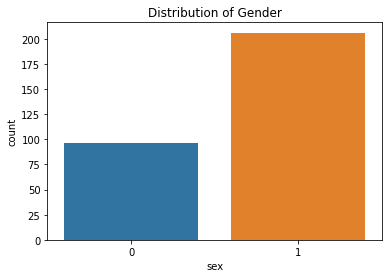

In [ ]:
ax=sns.countplot('sex',data=df)
plt.title("Distribution of Gender")
plt.show()


In [ ]:
df["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

Male proprtion is more than Female 

----------------------------------------------

Distribution of data with respect to Target variable (i.e, Heart attack)

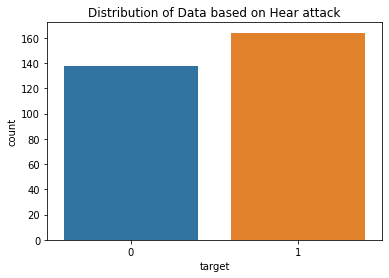

In [ ]:
sns.countplot('target',data=df)
plt.title("Distribution of Data based on Hear attack")
plt.show()

Observed equal distribution of data on Heart attatck "Yes" or "No"






----------------------------------------------

Distribution of data Age category across Gender

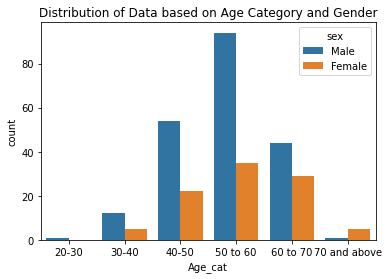

In [ ]:
sns.countplot(x="Age_cat", hue="sex", data=df_eda)
plt.title("Distribution of Data based on Age Category and Gender")
plt.show()

Male has higher proportinate compare to Female, and age category 50 to 60 is observed most of the observations

---------------------------------------

Proportionate of Age group and Heart attack occurance

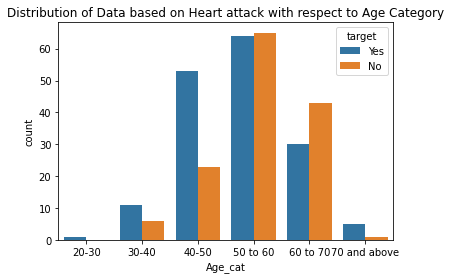

In [ ]:
sns.countplot(x="Age_cat", hue="target", data=df_eda)
plt.title("Distribution of Data based on Heart attack with respect to Age Category")
plt.show()

The proportionate of Heart attacks is observed higher rate in 40 to 50 years of age compared to other age category

--------------------------------


Impact of fbs (Fasting blood sugar ) on heart attack occurance

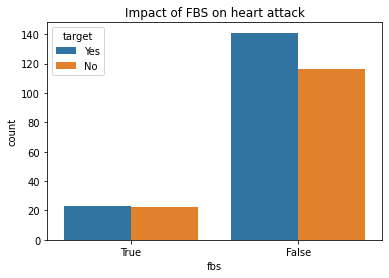

In [ ]:
sns.countplot(x="fbs", hue="target", data=df_eda)
plt.title("Impact of FBS on heart attack")
plt.show()

It is observed no significant impact of "fbs" on heart atatcks

------------------------------------------

Understanding the impact of "Resting blood pressure (in mm Hg on admission to the hospital)" on heart attack

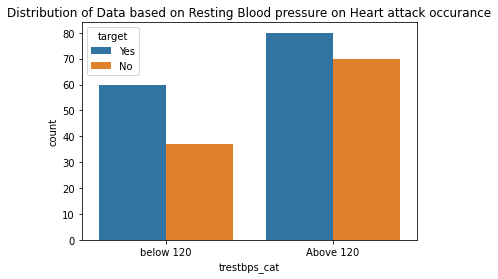

In [ ]:
sns.countplot(x="trestbps_cat", hue="target", data=df_eda)
plt.title("Distribution of Data based on Resting Blood pressure on Heart attack occurance")
plt.show()

It is observed no significant impact of "Resting Blood pressure" on heart atatcks

-------------------------------------------------------

Understanding the impact of "Resting blood pressure (in mm Hg on admission to the hospital)" on hear attack with Gender split

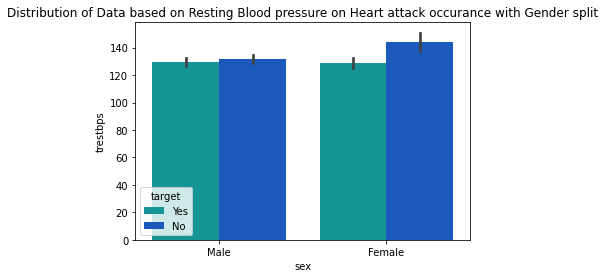

In [ ]:
sns.barplot(x='sex',y='trestbps',data=df_eda,hue='target',palette='winter_r')
plt.title("Distribution of Data based on Resting Blood pressure on Heart attack occurance with Gender split")
plt.show()

It is observed no significant impact of "Resting Blood pressure" on heart atatcks

---------------------------

Understanding the impact of Cholestrol on hear attack

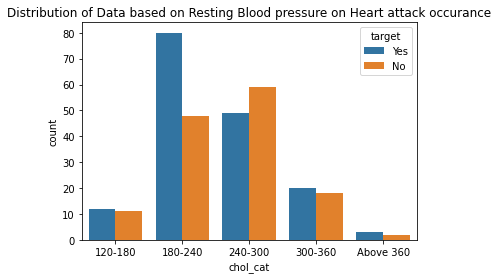

In [ ]:
sns.countplot(x="chol_cat", hue="target", data=df_eda)
plt.title("Distribution of Data based on Resting Blood pressure on Heart attack occurance")
plt.show()

It is observed Cholestrol between the range 180 to 240, high proportioante of heart attacks.But overall it seems no significant impact on heart attack occurance

-------------------------------------

Understanding the impact of Cholestrol on hear attack with Gender split

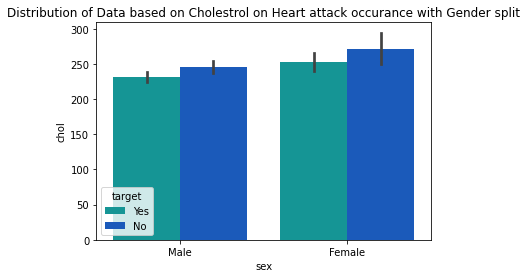

In [ ]:
sns.barplot(x='sex',y='chol',data=df_eda,hue='target',palette='winter_r')
plt.title("Distribution of Data based on Cholestrol on Heart attack occurance with Gender split")
plt.show()

No significant impact of Cholestrol on Heart attack occurance

------------------------------------

Data Distribution of "Chest pain type" on heart attack with Gender split

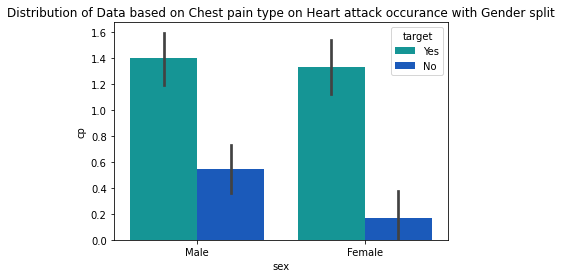

In [ ]:
sns.barplot(x='sex',y='cp',data=df_eda,hue='target',palette='winter_r')
plt.title("Distribution of Data based on Chest pain type on Heart attack occurance with Gender split")
plt.show()

Higher the chest pain type, risk of occurance of Heart atatck is high

---------------------------------------

Understanding impact of "Slope " on Heart attack

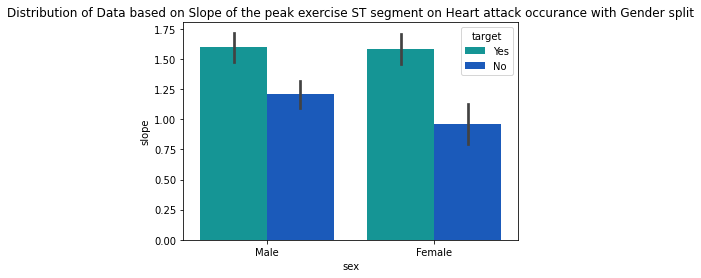

In [ ]:
sns.barplot(x='sex',y='slope',data=df_eda,hue='target',palette='winter_r')
plt.title("Distribution of Data based on Slope of the peak exercise ST segment on Heart attack occurance with Gender split")
plt.show()

It si observed major impact of "Slope" category on heart attack occurancee

------------------------------------

Understanding impact of "ST depression induced by exercise relative to rest " on Heart attack



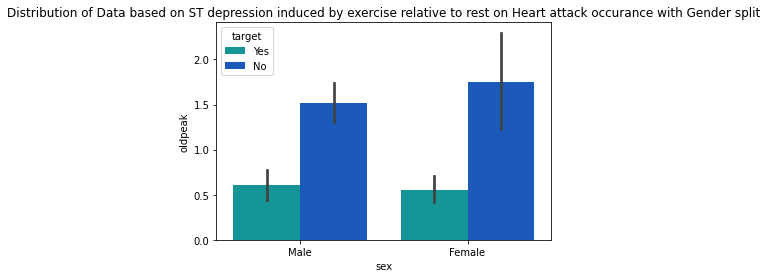

In [ ]:
sns.barplot(x='sex',y='oldpeak',data=df_eda,hue='target',palette='winter_r')
plt.title("Distribution of Data based on ST depression induced by exercise relative to rest on Heart attack occurance with Gender split")
plt.show()

Observed negative impact of "ST depression induced by exercise relative to rest " on hear attack occurance

------------------------------------------------------------

Understanding impact of "Maximum heart rate achieved " on Heart attack

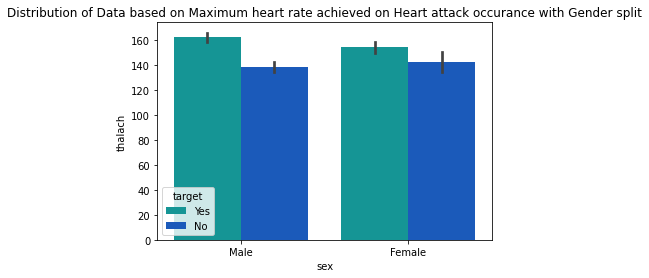

In [ ]:
sns.barplot(x='sex',y='thalach',data=df_eda,hue='target',palette='winter_r')
plt.title("Distribution of Data based on Maximum heart rate achieved on Heart attack occurance with Gender split")
plt.show()

Higher the "thalach" value, high risk of Heart attack occurance

-------------------------------------

# Pair Plots

Plotting pair plot of "trestbps","chol","thalach" with respect to Gender

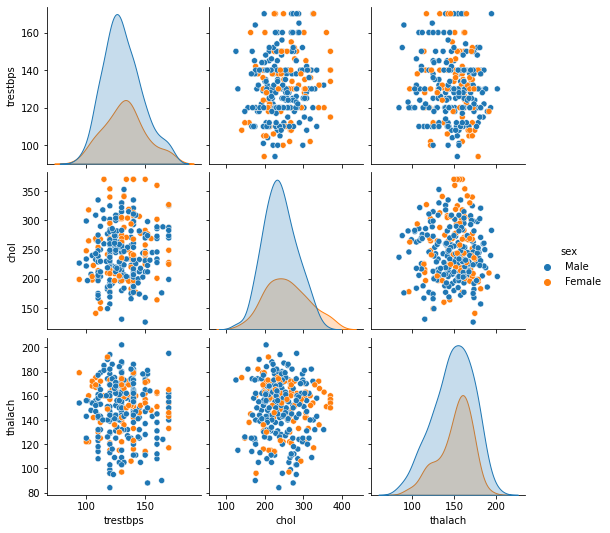

In [ ]:
sns.pairplot(df_eda, vars=["trestbps","chol","thalach"],hue='sex')
plt.show()

Plotting pair plot of "trestbps","chol","thalach" with respect to Target variable (i.e, Heart attack Yes or No

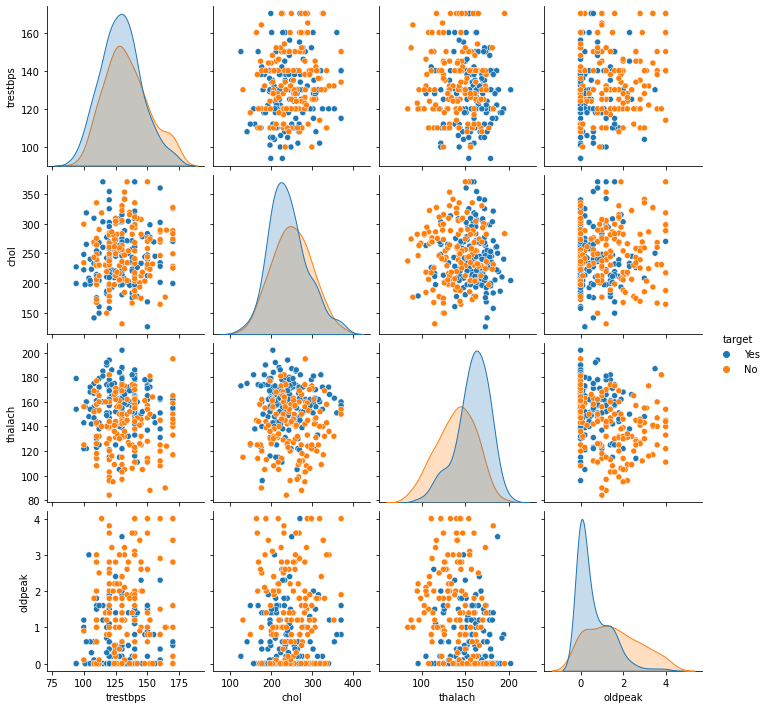

In [ ]:
sns.pairplot(df_eda, vars=["trestbps","chol","thalach",'oldpeak'],hue='target')
plt.show()

# **Understanding the Correlation between Feautues**

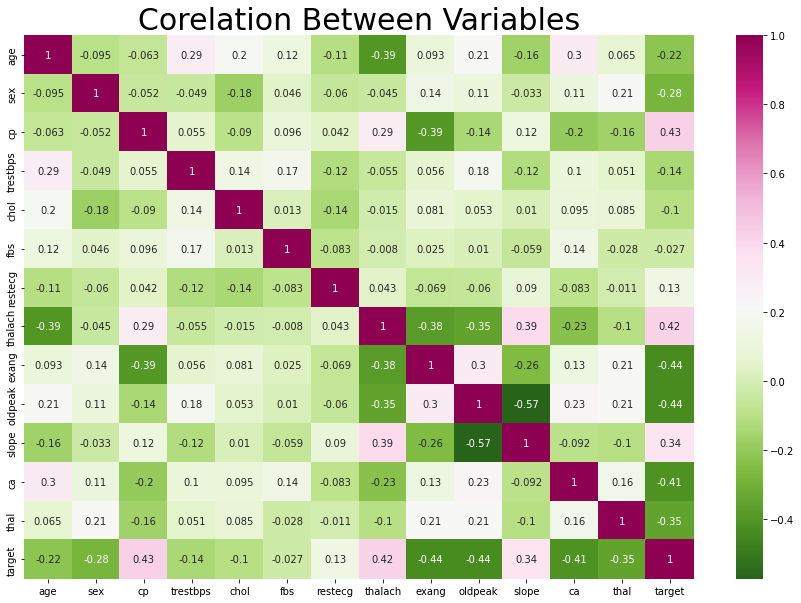

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(),annot=True,cmap='PiYG_r')
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()


It is observed a slight positive correlation of Features "CP", "thalach" and "Slope" on Target variable.
Whereas "thal", "ca", "oldpeak" and "	exang" have negative correlation

-------------------------------------------

# Compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [ ]:
corr = df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [ ]:
selected_columns = df.columns[columns]
selected_columns.shape

(14,)

## As we get same number of features as compared to original data set, we infer no major correlation between features

## **Building a Logistic Regression for Heart rate prediction**

**Passing data into X, y---X contains indepent variables and y being target variable**

In [ ]:
# Split X & Y
X=df.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0


In [ ]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
# Split the dataset into train set & Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


In [ ]:
# Instantiate the classifier
LogReg = LogisticRegression()

In [ ]:
# Train classifier
LogReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicting
y_pred = LogReg.predict(X_test)

**Model Evaluation**

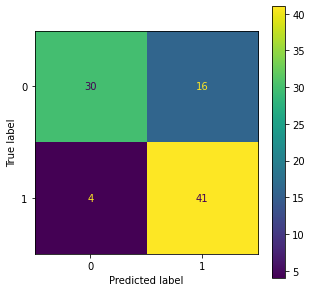

In [ ]:
plt.rcParams['figure.figsize'] = (5,5) 
plot_confusion_matrix(LogReg, X_test, y_test)
plt.show()

In [ ]:
# Accuracy score
metrics.accuracy_score(y_test, y_pred)

0.7802197802197802

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        46
           1       0.72      0.91      0.80        45

    accuracy                           0.78        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.78      0.78        91



In [ ]:
LogReg.predict_proba(X_test)

array([[0.66584703, 0.33415297],
       [0.04859919, 0.95140081],
       [0.74942624, 0.25057376],
       [0.18067161, 0.81932839],
       [0.88269439, 0.11730561],
       [0.46694945, 0.53305055],
       [0.15134476, 0.84865524],
       [0.30026585, 0.69973415],
       [0.06679905, 0.93320095],
       [0.2582129 , 0.7417871 ],
       [0.33618385, 0.66381615],
       [0.94037236, 0.05962764],
       [0.23151755, 0.76848245],
       [0.64087898, 0.35912102],
       [0.901443  , 0.098557  ],
       [0.66878026, 0.33121974],
       [0.90533244, 0.09466756],
       [0.99196506, 0.00803494],
       [0.15559167, 0.84440833],
       [0.41170546, 0.58829454],
       [0.12713269, 0.87286731],
       [0.14076227, 0.85923773],
       [0.22122077, 0.77877923],
       [0.0460867 , 0.9539133 ],
       [0.98964109, 0.01035891],
       [0.63926026, 0.36073974],
       [0.84810927, 0.15189073],
       [0.98541514, 0.01458486],
       [0.03613858, 0.96386142],
       [0.99268739, 0.00731261],
       [0.

In [ ]:
LogReg.coef_

array([[ 0.02070817, -1.26125791,  0.58121073, -0.01423154, -0.00616205,
        -0.14120567, -0.01095743,  0.02940706, -0.97959678, -0.52943245,
         0.64448342, -0.95271693, -0.4127933 ]])

In [ ]:
LogReg.intercept_

array([0.04607848])

**Building a Random Forest model for Heart rate prediction**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [ ]:
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
acc_train_rf, acc_test_rf

(1.0, 0.7802197802197802)

Finding importance of features

In [ ]:
rf.feature_importances_

array([0.08539181, 0.02985116, 0.15094041, 0.07670347, 0.07441871,
       0.01136344, 0.01642991, 0.11395435, 0.07269209, 0.12682   ,
       0.05161367, 0.1206474 , 0.06917359])

In [ ]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
imp = pd.DataFrame(rf.feature_importances_, 
             columns=['Importance Score'], 
             index=[X_train.columns])

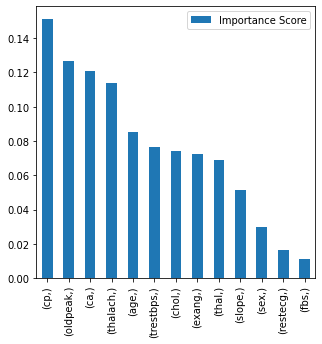

In [ ]:
imp.sort_values('Importance Score', ascending=False).plot(kind='bar');

**Model Accuracy for Logistic regression is 79 % and Random Forest is 76 % %**

**End of the Project**